In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unzip '/content/drive/MyDrive/Dataset.zip'

Streaming output truncated to the last 5000 lines.
  inflating: Dataset Plant Disease/Veg-dataset/Veg-dataset/train_set/Tomato___Bacterial_spot/d8914e04-4e33-4189-bfa9-f547e5f696d1___GCREC_Bact.Sp 3173.JPG  
  inflating: Dataset Plant Disease/Veg-dataset/Veg-dataset/train_set/Tomato___Bacterial_spot/d8a64b79-e21e-4158-9d9d-47bd6e44fba0___GCREC_Bact.Sp 3594.JPG  
  inflating: Dataset Plant Disease/Veg-dataset/Veg-dataset/train_set/Tomato___Bacterial_spot/d8a90b81-eb30-461d-80ba-4fa9c93f379d___GCREC_Bact.Sp 3757.JPG  
  inflating: Dataset Plant Disease/Veg-dataset/Veg-dataset/train_set/Tomato___Bacterial_spot/d8b6f17a-5189-47ae-904f-be4a09dce0ad___UF.GRC_BS_Lab Leaf 9009.JPG  
  inflating: Dataset Plant Disease/Veg-dataset/Veg-dataset/train_set/Tomato___Bacterial_spot/d8d2baf6-87de-43e5-bd40-48dfe33841d3___GCREC_Bact.Sp 5747.JPG  
  inflating: Dataset Plant Disease/Veg-dataset/Veg-dataset/train_set/Tomato___Bacterial_spot/d8d3c759-4242-42c0-9be5-b3177f2664be___GCREC_Bact.Sp 5953.JPG  
  

In [3]:
test_dir=r'/content/Dataset_Plant_Disease/Veg-dataset/Veg-dataset/test_set'

In [4]:
import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Convolution2D,MaxPooling2D,Flatten

In [6]:
model=Sequential()

In [7]:
model.add(Convolution2D(32,(3,3),input_shape=(128,128,3),activation='relu'))

In [8]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [9]:
model.add(Flatten())

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 127008)            0         
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))

In [13]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [14]:
model.save('vegetabledata.h5')

In [15]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [17]:
model=load_model('vegetabledata.h5')

In [20]:
test_datagen_1=ImageDataGenerator(rescale=1)
test_generator_1=test_datagen_1.flow_from_directory(
    test_dir,
    target_size=(128,128),
    batch_size=20,
    class_mode='categorical'
)

Found 3416 images belonging to 9 classes.


In [21]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [23]:
img=image.load_img(r"/content/Dataset_Plant_Disease/Veg-dataset/Veg-dataset/test_set/Potato___healthy/b9ea902d-e557-4fa5-893b-39a7a57c0121___RS_HL 1893.JPG")

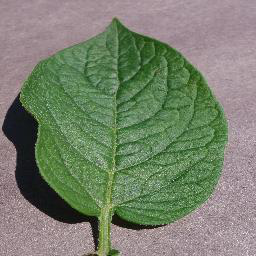

In [24]:
img

In [27]:
img=image.load_img(r"/content/Dataset_Plant_Disease/Veg-dataset/Veg-dataset/test_set/Potato___healthy/b9ea902d-e557-4fa5-893b-39a7a57c0121___RS_HL 1893.JPG",target_size=(128,128))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x),axis=1)
index=['Pepper,_bell___Bacterial_spot','Pepper,_bell___healthy','Potato___Early_blight','Potato___healthy','Potato___Late_blight','Tomato___Bacterial_spot','Tomato___Late_blight','Tomato___Leaf_Mold','Tomato___Septoria_leaf_spot']
index[y[0]]

1/1 [==============================] - 0s 53ms/step


'Potato___healthy'

In [28]:
model.evaluate(test_generator_1,steps=50)

50/50 [==============================] - 7s 143ms/step - loss: 66.8399 - accuracy: 0.0850


[66.83993530273438, 0.08500000089406967]